In [33]:
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib
import seaborn as sns

In [5]:
# Test for the set n.2
dataset = pd.read_csv('/home/developer/Documents/Machine Learning/Corteva/dataset/cleaned/dryer_3_fan_1_2020.csv', sep=';', usecols = ['Motor_Frequency_Cmd_Hz','X_Axis_High_Frequency_RMS_Acceleration','X_Axis_RMS_Velocity', 'Z_Axis_High_Frequency_RMS_Acceleration', 'Z_Axis_RMS_Velocity'],)
# dataset.columns = ['Motor_Frequency_Cmd_Hz','Timestamp','X_Axis_High_Frequency_RMS_Acceleration','X_Axis_RMS_Velocity', 'Z_Axis_High_Frequency_RMS_Acceleration', 'Z_Axis_RMS_Velocity']
dataset.head()

,Motor_Frequency_Cmd_Hz,X_Axis_High_Frequency_RMS_Acceleration,X_Axis_RMS_Velocity,Z_Axis_High_Frequency_RMS_Acceleration,Z_Axis_RMS_Velocity
0,"32,8","0,232","0,326","0,169","3,305"
1,"32,8","0,233","0,38","0,171","1,335"
2,"40,2","1,047","0,538","0,511","0,456"
3,"40,2","1,155","0,572","0,516","0,376"
4,"40,2","0,773","0,605","0,47","0,363"


In [6]:
# Convert values with comma into float
dataset['X_Axis_High_Frequency_RMS_Acceleration'] = dataset['X_Axis_High_Frequency_RMS_Acceleration'].astype(str).str.replace(',', '.').astype(float)
dataset['X_Axis_RMS_Velocity'] = dataset['X_Axis_RMS_Velocity'].astype(str).str.replace(',', '.').astype(float)
dataset['Z_Axis_High_Frequency_RMS_Acceleration'] = dataset['Z_Axis_High_Frequency_RMS_Acceleration'].astype(str).str.replace(',', '.').astype(float)
dataset['Z_Axis_RMS_Velocity'] = dataset['Z_Axis_RMS_Velocity'].astype(str).str.replace(',', '.').astype(float)
dataset['Motor_Frequency_Cmd_Hz'] = dataset['Motor_Frequency_Cmd_Hz'].astype(str).str.replace(',', '.').astype(float)
dataset

,Motor_Frequency_Cmd_Hz,X_Axis_High_Frequency_RMS_Acceleration,X_Axis_RMS_Velocity,Z_Axis_High_Frequency_RMS_Acceleration,Z_Axis_RMS_Velocity
0,32.8,0.232,0.326,0.169,3.305
1,32.8,0.233,0.380,0.171,1.335
2,40.2,1.047,0.538,0.511,0.456
3,40.2,1.155,0.572,0.516,0.376
4,40.2,0.773,0.605,0.470,0.363
...,...,...,...,...,...
2690,44.0,1.340,1.607,1.053,1.264
2691,44.0,1.441,1.786,1.060,2.514
2692,44.0,1.408,1.395,1.047,1.718
2693,44.0,1.363,2.217,1.085,3.470


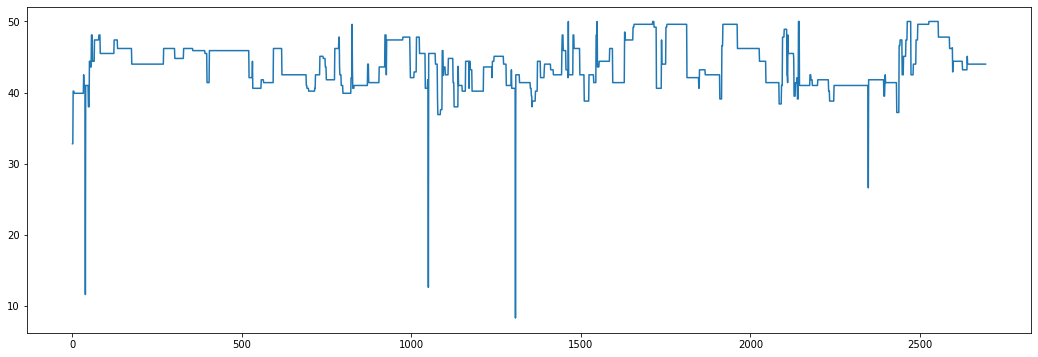

In [7]:
dataset['Motor_Frequency_Cmd_Hz'].plot(figsize=(18,6));



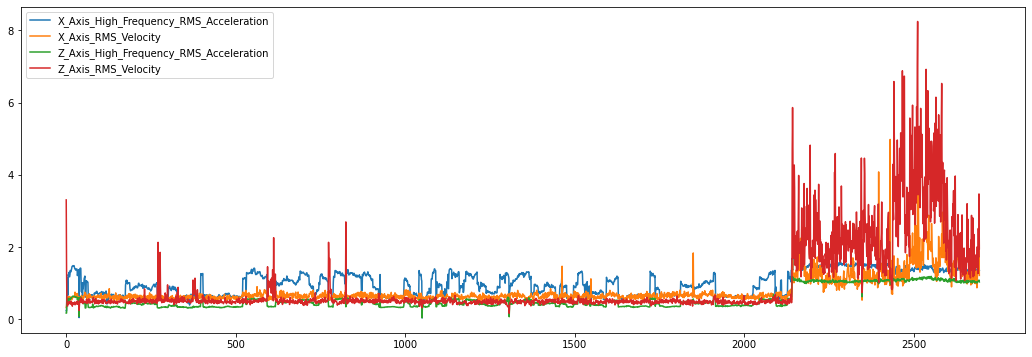

In [8]:
dataset[['X_Axis_High_Frequency_RMS_Acceleration', 'X_Axis_RMS_Velocity', 'Z_Axis_High_Frequency_RMS_Acceleration', 'Z_Axis_RMS_Velocity']].plot(figsize=(18,6));

In [9]:
# Split trainig set and test set

# Training set
training_set = dataset[0:2092]
training_set



,Motor_Frequency_Cmd_Hz,X_Axis_High_Frequency_RMS_Acceleration,X_Axis_RMS_Velocity,Z_Axis_High_Frequency_RMS_Acceleration,Z_Axis_RMS_Velocity
0,32.8,0.232,0.326,0.169,3.305
1,32.8,0.233,0.380,0.171,1.335
2,40.2,1.047,0.538,0.511,0.456
3,40.2,1.155,0.572,0.516,0.376
4,40.2,0.773,0.605,0.470,0.363
...,...,...,...,...,...
2087,38.4,1.252,0.518,0.688,0.554
2088,38.4,1.265,0.619,0.626,0.505
2089,38.4,1.314,0.566,0.623,0.617
2090,38.4,1.301,0.587,0.609,0.590


In [10]:
# Test set
test_set = dataset[2093: ]
test_set



,Motor_Frequency_Cmd_Hz,X_Axis_High_Frequency_RMS_Acceleration,X_Axis_RMS_Velocity,Z_Axis_High_Frequency_RMS_Acceleration,Z_Axis_RMS_Velocity
2093,41.0,0.870,0.636,0.507,0.514
2094,41.0,0.895,0.621,0.470,0.439
2095,47.8,0.546,0.746,0.369,0.537
2096,47.8,0.541,0.724,0.362,0.573
2097,47.8,0.546,0.700,0.359,0.497
...,...,...,...,...,...
2690,44.0,1.340,1.607,1.053,1.264
2691,44.0,1.441,1.786,1.060,2.514
2692,44.0,1.408,1.395,1.047,1.718
2693,44.0,1.363,2.217,1.085,3.470


In [11]:
# normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(training_set)
X_test = scaler.transform(test_set)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)



['scaler_data']

In [12]:
# reshape inputs [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (2092, 1, 5)
Test data shape: (602, 1, 5)


In [13]:
X_train



array([[[0.58752998, 0.13655172, 0.08323208, 0.19907407, 1.        ]],

       [[0.58752998, 0.13724138, 0.11603888, 0.20216049, 0.37281121]],

       [[0.76498801, 0.69862069, 0.21202916, 0.72685185, 0.09296402]],

       ...,

       [[0.72182254, 0.88275862, 0.2290401 , 0.89969136, 0.14422159]],

       [[0.72182254, 0.8737931 , 0.2417983 , 0.87808642, 0.1356256 ]],

       [[0.72182254, 0.90827586, 0.26063183, 0.9058642 , 0.13307864]]])

In [30]:
X_test

array([[[0.78417266, 0.57655172, 0.27156744, 0.72067901, 0.11142948]],

       [[0.78417266, 0.5937931 , 0.26245443, 0.66358025, 0.08755174]],

       [[0.94724221, 0.35310345, 0.33839611, 0.50771605, 0.11875199]],

       ...,

       [[0.85611511, 0.94758621, 0.7326853 , 1.55401235, 0.4947469 ]],

       [[0.85611511, 0.91655172, 1.23207776, 1.61265432, 1.05253104]],

       [[0.85611511, 0.90965517, 0.62211422, 1.5308642 , 0.5698822 ]]])

In [19]:
# Model creation

# INPUT
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# ENCODER
encoded = Dense(128, activation='relu')(inputs)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# DECODER
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(5, activation='sigmoid')(decoded)

# MODEL
autoencoder = Model(inputs, decoded)

In [22]:
autoencoder.compile(optimizer='adam', loss='mae')

In [23]:
# fit the model to the data
nb_epochs = 300
batch_size = 10
history = autoencoder.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/300
199/199 [==============================] - 2s 4ms/step - loss: 0.0228 - val_loss: 0.0228
Epoch 2/300
199/199 [==============================] - 1s 4ms/step - loss: 0.0219 - val_loss: 0.0233
Epoch 3/300
199/199 [==============================] - 1s 4ms/step - loss: 0.0206 - val_loss: 0.0172
Epoch 4/300
199/199 [==============================] - 1s 3ms/step - loss: 0.0189 - val_loss: 0.0155
Epoch 5/300
199/199 [==============================] - 1s 3ms/step - loss: 0.0163 - val_loss: 0.0172
Epoch 6/300
199/199 [==============================] - 1s 3ms/step - loss: 0.0130 - val_loss: 0.0103
Epoch 7/300
199/199 [==============================] - 1s 4ms/step - loss: 0.0112 - val_loss: 0.0111
Epoch 8/300
199/199 [==============================] - 1s 3ms/step - loss: 0.0099 - val_loss: 0.0134
Epoch 9/300
199/199 [==============================] - 1s 3ms/step - loss: 0.0104 - val_loss: 0.0108
Epoch 10/300
199/199 [==============================] - 1s 3ms/step - loss: 0.0086 - val_lo

199/199 [==============================] - 1s 7ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 82/300
199/199 [==============================] - 1s 5ms/step - loss: 0.0030 - val_loss: 0.0058
Epoch 83/300
199/199 [==============================] - 1s 4ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 84/300
199/199 [==============================] - 1s 4ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 85/300
199/199 [==============================] - 1s 4ms/step - loss: 0.0028 - val_loss: 0.0037
Epoch 86/300
199/199 [==============================] - 1s 4ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 87/300
199/199 [==============================] - 1s 4ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 88/300
199/199 [==============================] - 1s 4ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 89/300
199/199 [==============================] - 1s 4ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 90/300
199/199 [==============================] - 1s 5ms/step - loss: 0.0032 - val_loss: 

Epoch 161/300
199/199 [==============================] - 1s 4ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 162/300
199/199 [==============================] - 1s 6ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 163/300
199/199 [==============================] - 1s 5ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 164/300
199/199 [==============================] - 1s 7ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 165/300
199/199 [==============================] - 1s 4ms/step - loss: 0.0022 - val_loss: 0.0037
Epoch 166/300
199/199 [==============================] - 1s 5ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 167/300
199/199 [==============================] - 1s 4ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 168/300
199/199 [==============================] - 1s 4ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 169/300
199/199 [==============================] - 1s 5ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 170/300
199/199 [==============================] - 1s 6ms/step - lo

199/199 [==============================] - 1s 6ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 241/300
199/199 [==============================] - 1s 6ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 242/300
199/199 [==============================] - 1s 6ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 243/300
199/199 [==============================] - 1s 5ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 244/300
199/199 [==============================] - 1s 7ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 245/300
199/199 [==============================] - 1s 5ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 246/300
199/199 [==============================] - 1s 5ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 247/300
199/199 [==============================] - 1s 6ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 248/300
199/199 [==============================] - 1s 4ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 249/300
199/199 [==============================] - 1s 5ms/step - loss: 0.0022 - v

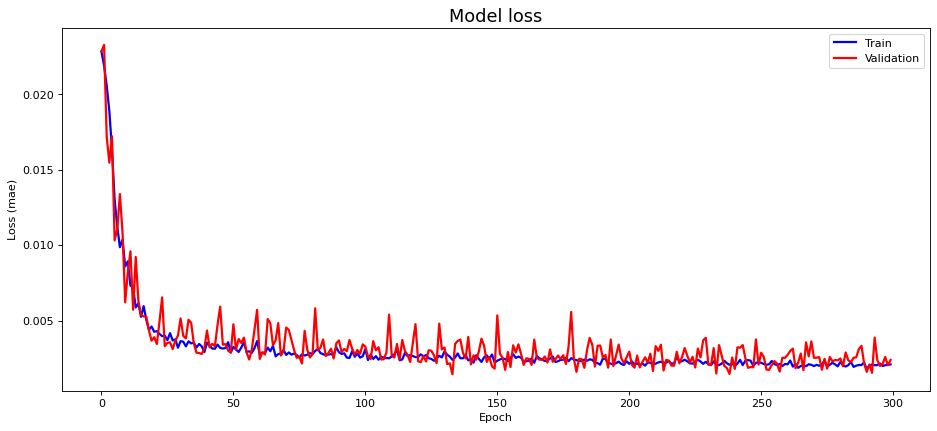

In [25]:
# Gest fit resutls
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [26]:
vibrations_pred = autoencoder.predict(X_test)

In [29]:
vibrations_pred

array([[[0.787013  , 0.57950854, 0.27040666, 0.71818763, 0.11473018]],

       [[0.7861149 , 0.5947365 , 0.26140437, 0.65802586, 0.0900355 ]],

       [[0.94445217, 0.3561193 , 0.33835018, 0.5053202 , 0.12210026]],

       ...,

       [[0.93354374, 0.9222431 , 0.8409054 , 0.992404  , 0.29416814]],

       [[0.9982063 , 0.8429465 , 0.9911114 , 0.9789876 , 0.76587   ]],

       [[0.93146074, 0.89690685, 0.47330403, 0.9913702 , 0.36107874]]],
      dtype=float32)

/home/developer/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.01)

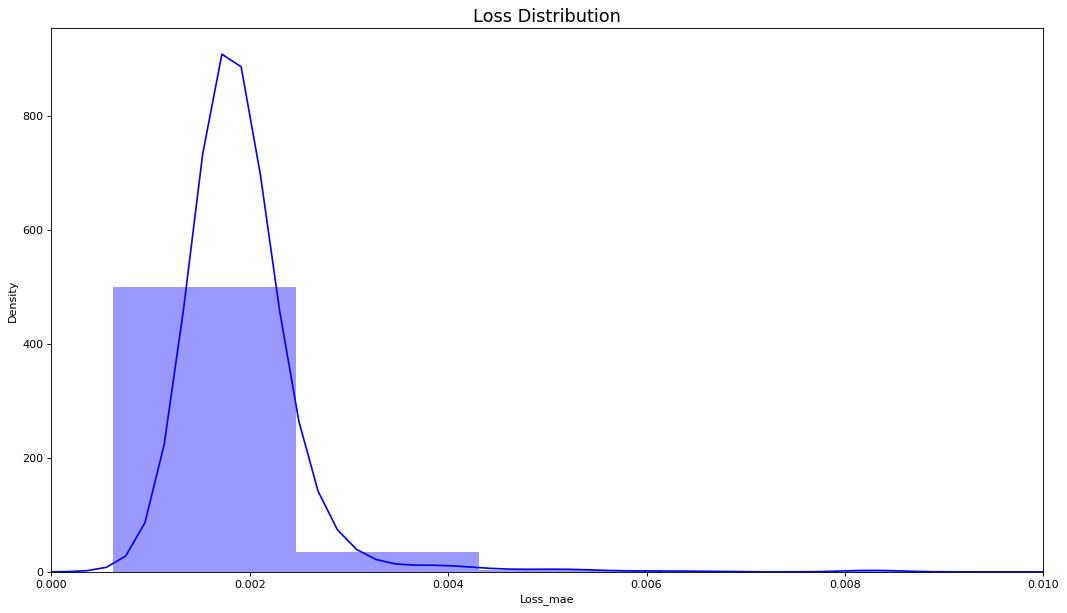

In [36]:
# Distribution of Loss Function
# By plotting the distribution of the calculated loss in the training set, one can use this to identify a suitable thresho

# plot the loss distribution of the training set
X_pred = autoencoder.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=training_set.columns)
X_pred.index = training_set.index

scored = pd.DataFrame(index=training_set.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.01])






In [38]:
# calculate the loss on the test set
X_pred = autoencoder.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test_set.columns)
X_pred.index = test_set.index

scored = pd.DataFrame(index=test_set.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.003
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
2093,0.002550,0.003,False
2094,0.002395,0.003,False
2095,0.002319,0.003,False
2096,0.002857,0.003,False
2097,0.003221,0.003,True
